In [45]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

In [46]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [47]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [48]:
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [49]:
weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                      mean = 0,
                                      stddev = 0.01,
                                      name = "weights"))

bias = tf.Variable(tf.random_normal([1, numLabels],
                                   mean = 0,
                                   stddev = 0.01,
                                   name = "bias"))

In [50]:
apply_weights_OP = tf.matmul(X, weights, name = "apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name = "add_bias")
activation_OP = tf.nn.sigmoid(add_bias_OP, name = "activation")

In [51]:
numEpochs = 7000
learningRate = tf.train.exponential_decay(learning_rate = 0.0008,
                                         global_step = 1,
                                         decay_steps = trainX.shape[0],
                                         decay_rate = 0.95,
                                         staircase = True)

In [52]:
cost_OP = tf.nn.l2_loss(activation_OP - yGold, name = "squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [53]:
sess = tf.Session()
init_OP = tf.global_variables_initializer()
sess.run(init_OP)

In [54]:
correct_predictions_OP = tf.equal(tf.argmax(activation_OP, 1), tf.argmax(yGold, 1))
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
activation_summary_OP = tf.summary.histogram("output", activation_OP)
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)
cost_summary_OP = tf.summary.scalar("cost", cost_OP)
weightSummary = tf.summary.histogram("weights", weights.eval(session= sess))
biasSummary = tf.summary.histogram("bias", bias.eval(session= sess))
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [55]:
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

for i in range(numEpochs):
    if i > 1 and diff < 0.0001:
        print("Change in cost %g; convergence." %diff)
        break
    else:
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        if i % 10 == 0:
            epoch_values.append(i)
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            diff = abs(newCost - cost)
            cost = newCost
            
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))
            

step 0, training accuracy 0.333333, cost 34.4083, change in cost 34.4083
step 10, training accuracy 0.59596, cost 29.9389, change in cost 4.46941
step 20, training accuracy 0.646465, cost 28.0351, change in cost 1.90378
step 30, training accuracy 0.646465, cost 26.4243, change in cost 1.61086
step 40, training accuracy 0.646465, cost 25.0823, change in cost 1.34194
step 50, training accuracy 0.646465, cost 23.9711, change in cost 1.1112
step 60, training accuracy 0.646465, cost 23.0495, change in cost 0.921606
step 70, training accuracy 0.646465, cost 22.2804, change in cost 0.769083
step 80, training accuracy 0.646465, cost 21.6331, change in cost 0.647329
step 90, training accuracy 0.646465, cost 21.083, change in cost 0.550138
step 100, training accuracy 0.666667, cost 20.6108, change in cost 0.472206
step 110, training accuracy 0.666667, cost 20.2015, change in cost 0.409277
step 120, training accuracy 0.666667, cost 19.8434, change in cost 0.358063
step 130, training accuracy 0.66

step 1240, training accuracy 0.939394, cost 13.6112, change in cost 0.0168924
step 1250, training accuracy 0.939394, cost 13.5945, change in cost 0.0167265
step 1260, training accuracy 0.939394, cost 13.5779, change in cost 0.0165663
step 1270, training accuracy 0.939394, cost 13.5615, change in cost 0.0164042
step 1280, training accuracy 0.939394, cost 13.5453, change in cost 0.0162497
step 1290, training accuracy 0.939394, cost 13.5292, change in cost 0.0160933
step 1300, training accuracy 0.939394, cost 13.5132, change in cost 0.0159397
step 1310, training accuracy 0.939394, cost 13.4974, change in cost 0.0157909
step 1320, training accuracy 0.939394, cost 13.4818, change in cost 0.0156422
step 1330, training accuracy 0.939394, cost 13.4663, change in cost 0.0154953
step 1340, training accuracy 0.939394, cost 13.4509, change in cost 0.0153513
step 1350, training accuracy 0.939394, cost 13.4357, change in cost 0.0152121
step 1360, training accuracy 0.939394, cost 13.4207, change in c

step 2440, training accuracy 0.959596, cost 12.3301, change in cost 0.00686073
step 2450, training accuracy 0.959596, cost 12.3232, change in cost 0.00682068
step 2460, training accuracy 0.959596, cost 12.3165, change in cost 0.00678062
step 2470, training accuracy 0.959596, cost 12.3097, change in cost 0.00674343
step 2480, training accuracy 0.959596, cost 12.303, change in cost 0.00670338
step 2490, training accuracy 0.959596, cost 12.2964, change in cost 0.00666332
step 2500, training accuracy 0.959596, cost 12.2897, change in cost 0.00662613
step 2510, training accuracy 0.959596, cost 12.2831, change in cost 0.00658607
step 2520, training accuracy 0.959596, cost 12.2766, change in cost 0.00655079
step 2530, training accuracy 0.959596, cost 12.2701, change in cost 0.00651264
step 2540, training accuracy 0.959596, cost 12.2636, change in cost 0.00647354
step 2550, training accuracy 0.959596, cost 12.2572, change in cost 0.00643921
step 2560, training accuracy 0.959596, cost 12.2508, 

step 3610, training accuracy 0.959596, cost 11.7322, change in cost 0.00384521
step 3620, training accuracy 0.959596, cost 11.7284, change in cost 0.00382614
step 3630, training accuracy 0.959596, cost 11.7246, change in cost 0.00381184
step 3640, training accuracy 0.959596, cost 11.7208, change in cost 0.00379562
step 3650, training accuracy 0.959596, cost 11.717, change in cost 0.00378036
step 3660, training accuracy 0.959596, cost 11.7133, change in cost 0.00376415
step 3670, training accuracy 0.959596, cost 11.7095, change in cost 0.00374889
step 3680, training accuracy 0.959596, cost 11.7058, change in cost 0.00373363
step 3690, training accuracy 0.959596, cost 11.7021, change in cost 0.00371742
step 3700, training accuracy 0.959596, cost 11.6984, change in cost 0.00370407
step 3710, training accuracy 0.959596, cost 11.6947, change in cost 0.0036869
step 3720, training accuracy 0.959596, cost 11.691, change in cost 0.00367355
step 3730, training accuracy 0.959596, cost 11.6873, ch

step 4880, training accuracy 0.949495, cost 11.3455, change in cost 0.00243568
step 4890, training accuracy 0.949495, cost 11.343, change in cost 0.00242805
step 4900, training accuracy 0.949495, cost 11.3406, change in cost 0.00242138
step 4910, training accuracy 0.949495, cost 11.3382, change in cost 0.0024147
step 4920, training accuracy 0.949495, cost 11.3358, change in cost 0.00240517
step 4930, training accuracy 0.949495, cost 11.3334, change in cost 0.00239849
step 4940, training accuracy 0.949495, cost 11.331, change in cost 0.00239277
step 4950, training accuracy 0.949495, cost 11.3286, change in cost 0.00238419
step 4960, training accuracy 0.949495, cost 11.3262, change in cost 0.0023756
step 4970, training accuracy 0.949495, cost 11.3239, change in cost 0.00236988
step 4980, training accuracy 0.949495, cost 11.3215, change in cost 0.0023632
step 4990, training accuracy 0.949495, cost 11.3191, change in cost 0.00235558
step 5000, training accuracy 0.949495, cost 11.3168, chan

step 6070, training accuracy 0.949495, cost 11.0999, change in cost 0.00175762
step 6080, training accuracy 0.949495, cost 11.0982, change in cost 0.00175571
step 6090, training accuracy 0.949495, cost 11.0964, change in cost 0.00175285
step 6100, training accuracy 0.949495, cost 11.0947, change in cost 0.00174618
step 6110, training accuracy 0.949495, cost 11.0929, change in cost 0.00174236
step 6120, training accuracy 0.949495, cost 11.0912, change in cost 0.00174046
step 6130, training accuracy 0.949495, cost 11.0895, change in cost 0.00173378
step 6140, training accuracy 0.949495, cost 11.0877, change in cost 0.00172997
step 6150, training accuracy 0.949495, cost 11.086, change in cost 0.00172615
step 6160, training accuracy 0.949495, cost 11.0843, change in cost 0.00172043
step 6170, training accuracy 0.949495, cost 11.0826, change in cost 0.00172043
step 6180, training accuracy 0.949495, cost 11.0809, change in cost 0.0017128
step 6190, training accuracy 0.949495, cost 11.0792, c

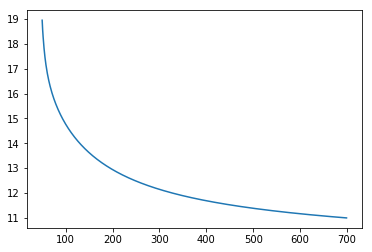

In [56]:
%matplotlib inline
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()